# Trash Detection using YOLOv8

## Part 2 - YOLOv8

-------------------------------------

In [ ]:
!nvidia-smi

Tue Feb  7 03:34:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/SELab-Tutorials/Tutorial-YOLO

/content/drive/MyDrive/SELab-Tutorials/Tutorial-YOLO


## 1. Introduction
### 1.1 Brief of history
YOLO (You Only Look Once) is a popular object detection and image segmentation model developed by Joseph Redmon and Ali Farhadi at the University of Washington. The first version of YOLO was released in 2015 and quickly gained popularity due to its high speed and accuracy.

Over the years, several versions of YOLO have been released. To sum up

| YOLO Model | Year of Release | Improvements |
|------------|------------------|--------------|
| YOLOv2 | 2016 | Batch normalization, anchor boxes, and dimension clusters |
| YOLOv3 | 2018 | More efficient backbone network, feature pyramid, focal loss |
| YOLOv4 | 2020 | Mosaic data augmentation, anchor-free detection head, new loss function |
| YOLOv5 | 2021 | Improved performance, support for panoptic segmentation, object tracking |
| YOLOv6 | 2022 |  |
| YOLOv7 | 2022 |  |

### 1.2 YOLOv8
Ultralytics YOLOv8 🚀 is the latest version of the YOLO object detection and image segmentation model developed by Ultralytics. YOLOv8 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility.

In this tutorial, we will utilize this version for our detection problem due to its high performance and ease of use.


## 2. Dataset


Extract the `trashcan-yolo.zip` that processed data in part 1.

*Note: we have provided the processed data in the tutorial folder, which you can use right away.*


In [ ]:
!unzip /content/drive/MyDrive/SELab-Tutorials/Tutorial-YOLO/trashcan-yolo.zip

After we extracted

    datasets
    |-- data
    |   |-- train //6065 images + annotation files
    |   |   |-- images
    |   |   |-- labels
    |   |   `-- labels.cache
    |   `-- val //1147 images + annotation files
    |       |-- images
    |       |-- labels
    |       `-- labels.cache
    `-- data.yaml
    



In [ ]:
%cat datasets/data.yaml

# Train/val dir
path: data/
train: train/images
val: val/images

# number of classes
nc: 22

# class names
names:
- rov
- plant
- animal_fish
- animal_starfish
- animal_shells
- animal_crab
- animal_eel
- animal_etc
- trash_clothing
- trash_pipe
- trash_bottle
- trash_bag
- trash_snack_wrapper
- trash_can
- trash_cup
- trash_container
- trash_unknown_instance
- trash_branch
- trash_wreckage
- trash_tarp
- trash_rope
- trash_net



###2.1 Dataset format
Dataset follow YOLO format consists of images in `*.jpg` and `*.txt files`. `*.txt file` same names as images files have. These *.txt files include annotations of bounding boxes of item in the YOLO format:

`[Class Number] [center in x] [center in y] [Width] [Height]`

For example, file `vid_000002_frame0000023.txt` includes one bounding boxes (each in a new line) that describe items in `vid_000002_frame0000023.jpg` image:

`8 0.5135 0.9574 0.1229 0.0926`




Visualize some sample images which were prepared

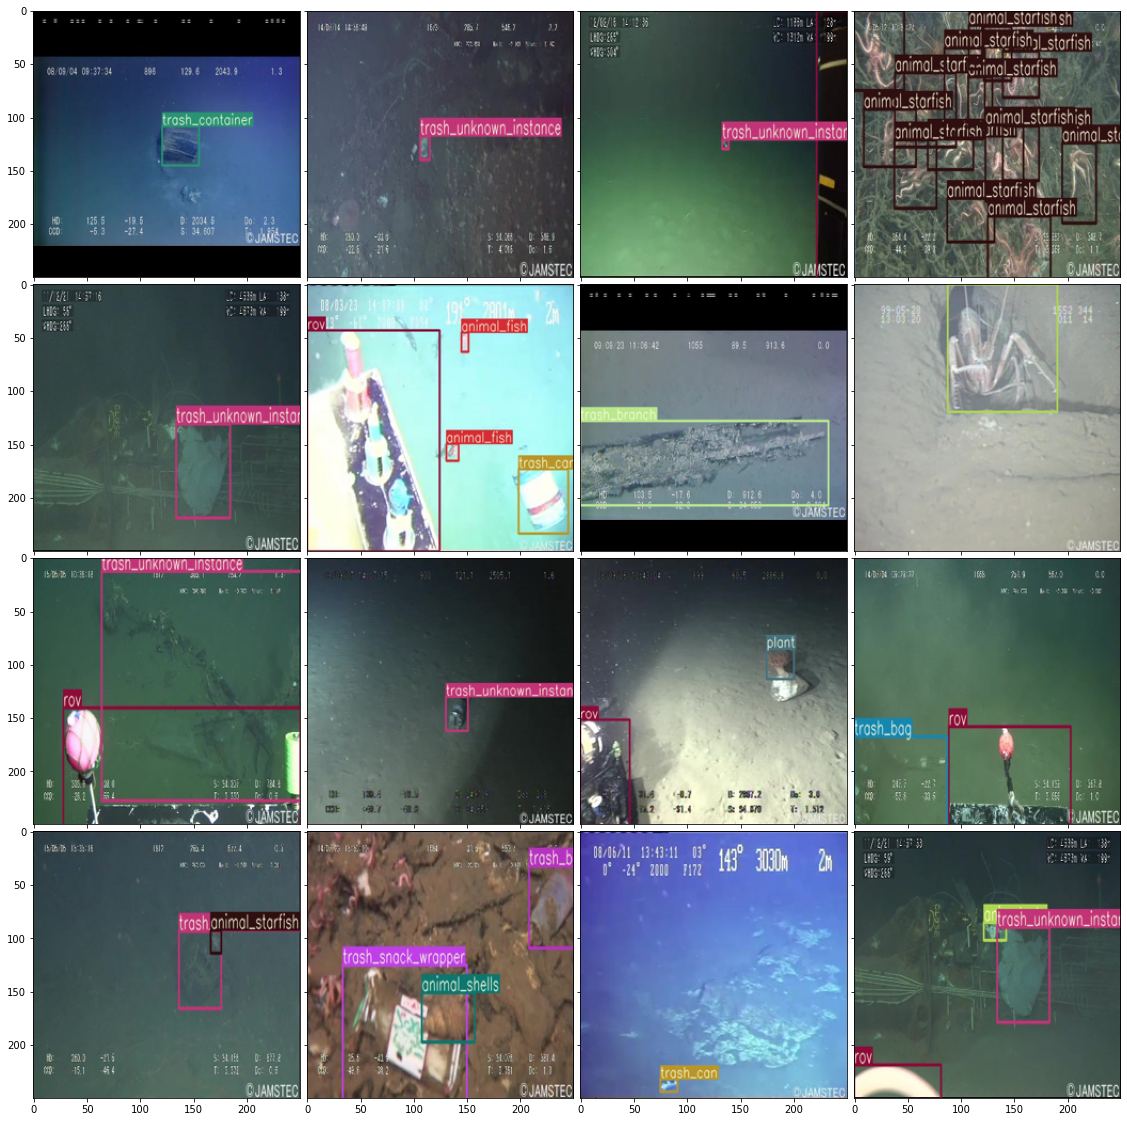

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

source_image_path = '/content/drive/MyDrive/SELab-Tutorials/Tutorial-YOLO/sample_images'

def img_reshape(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((250, 250))
    img = np.asarray(img)
    return img


images = [os.path.join(source_image_path, file) for file in os.listdir(source_image_path)]
img_arr = []

for image in images:
    img_arr.append(img_reshape(image))


fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 4),  # creates 4x4 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()


## 3. Training

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.29 🚀 Python-3.9.7 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)
Setup complete ✅ (12 CPUs, 15.4 GB RAM, 172.5/178.2 GB disk)


I am using a YOLOv8n pretrained model for custom training

Parameters:
- Specify the path to the data configuration file
- Specify a path to weights to start transfer learning from yolov8n.pt (starting from Pretrained weights on MSCOCO dataset)
- Image size
- Size of a batch (model weights are updated with each batch).
- No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [ ]:
from ultralytics import YOLO

If you want to train from scratch, run this cell (or you want to use the pre-trained weight that I trained on this setting, run this cell below)

In [ ]:
# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
# load a pretrained model (recommended for training)
model = YOLO("yolov8n.pt")

# Use the model
results = model.train(
    data="datasets/data.yaml", epochs=50, imgsz=480) #same as shape of images in dataset


In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")


Validate trained YOLOv8n model accuracy on the validation dataset.

In [ ]:
# evaluate model performance on the validation set
results = model.val(data="datasets/data.yaml")


Ultralytics YOLOv8.0.29 🚀 Python-3.9.7 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)
Model summary (fused): 218 layers, 25852498 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /home/zephy_manjaro/workspace/code/projects/SELab/ml-tutorial/tutorial-YOLO/datasets/data/val/labels... 1147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1147/1147 [00:00<00:00, 2262.61it/s]
val: WARNING ⚠️ /home/zephy_manjaro/workspace/code/projects/SELab/ml-tutorial/tutorial-YOLO/datasets/data/val/images/vid_000143_frame0000013.jpg: 1 duplicate labels removed
val: New cache created: /home/zephy_manjaro/workspace/code/projects/SELab/ml-tutorial/tutorial-YOLO/datasets/data/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [02:31<00:00,  2.10s/it]
                   all       1147       2587      0.786      0.615      0.713       0.52
                   rov       1147        683       0.89      0.876      0.

## 5. Result

Displaying the results during training

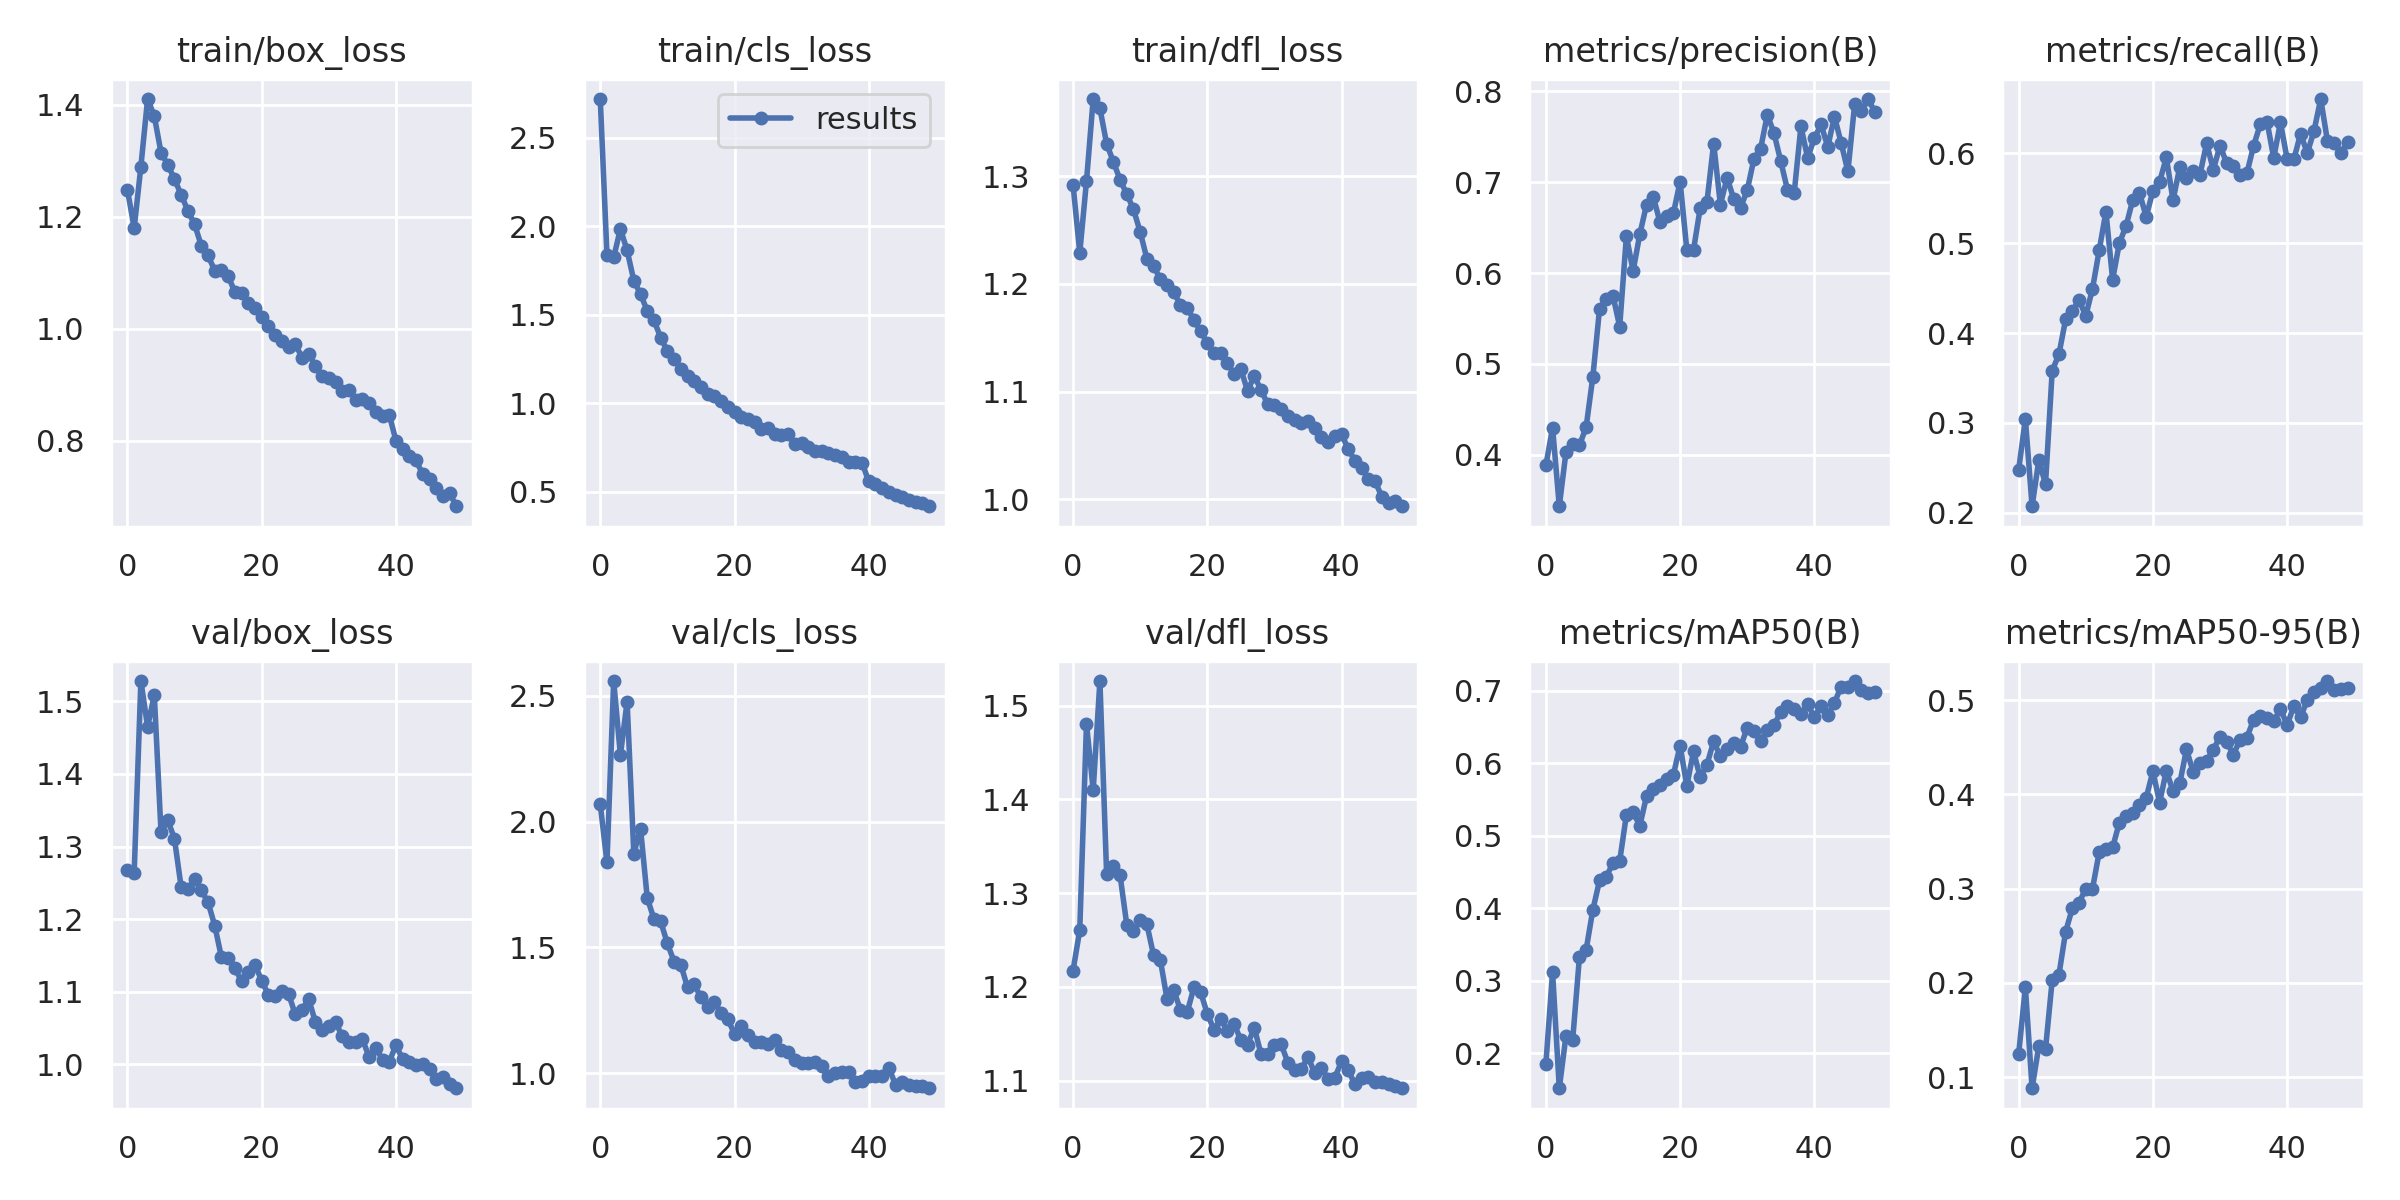

In [ ]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/results.png') 
display(x)

Dislaying metrics for train data

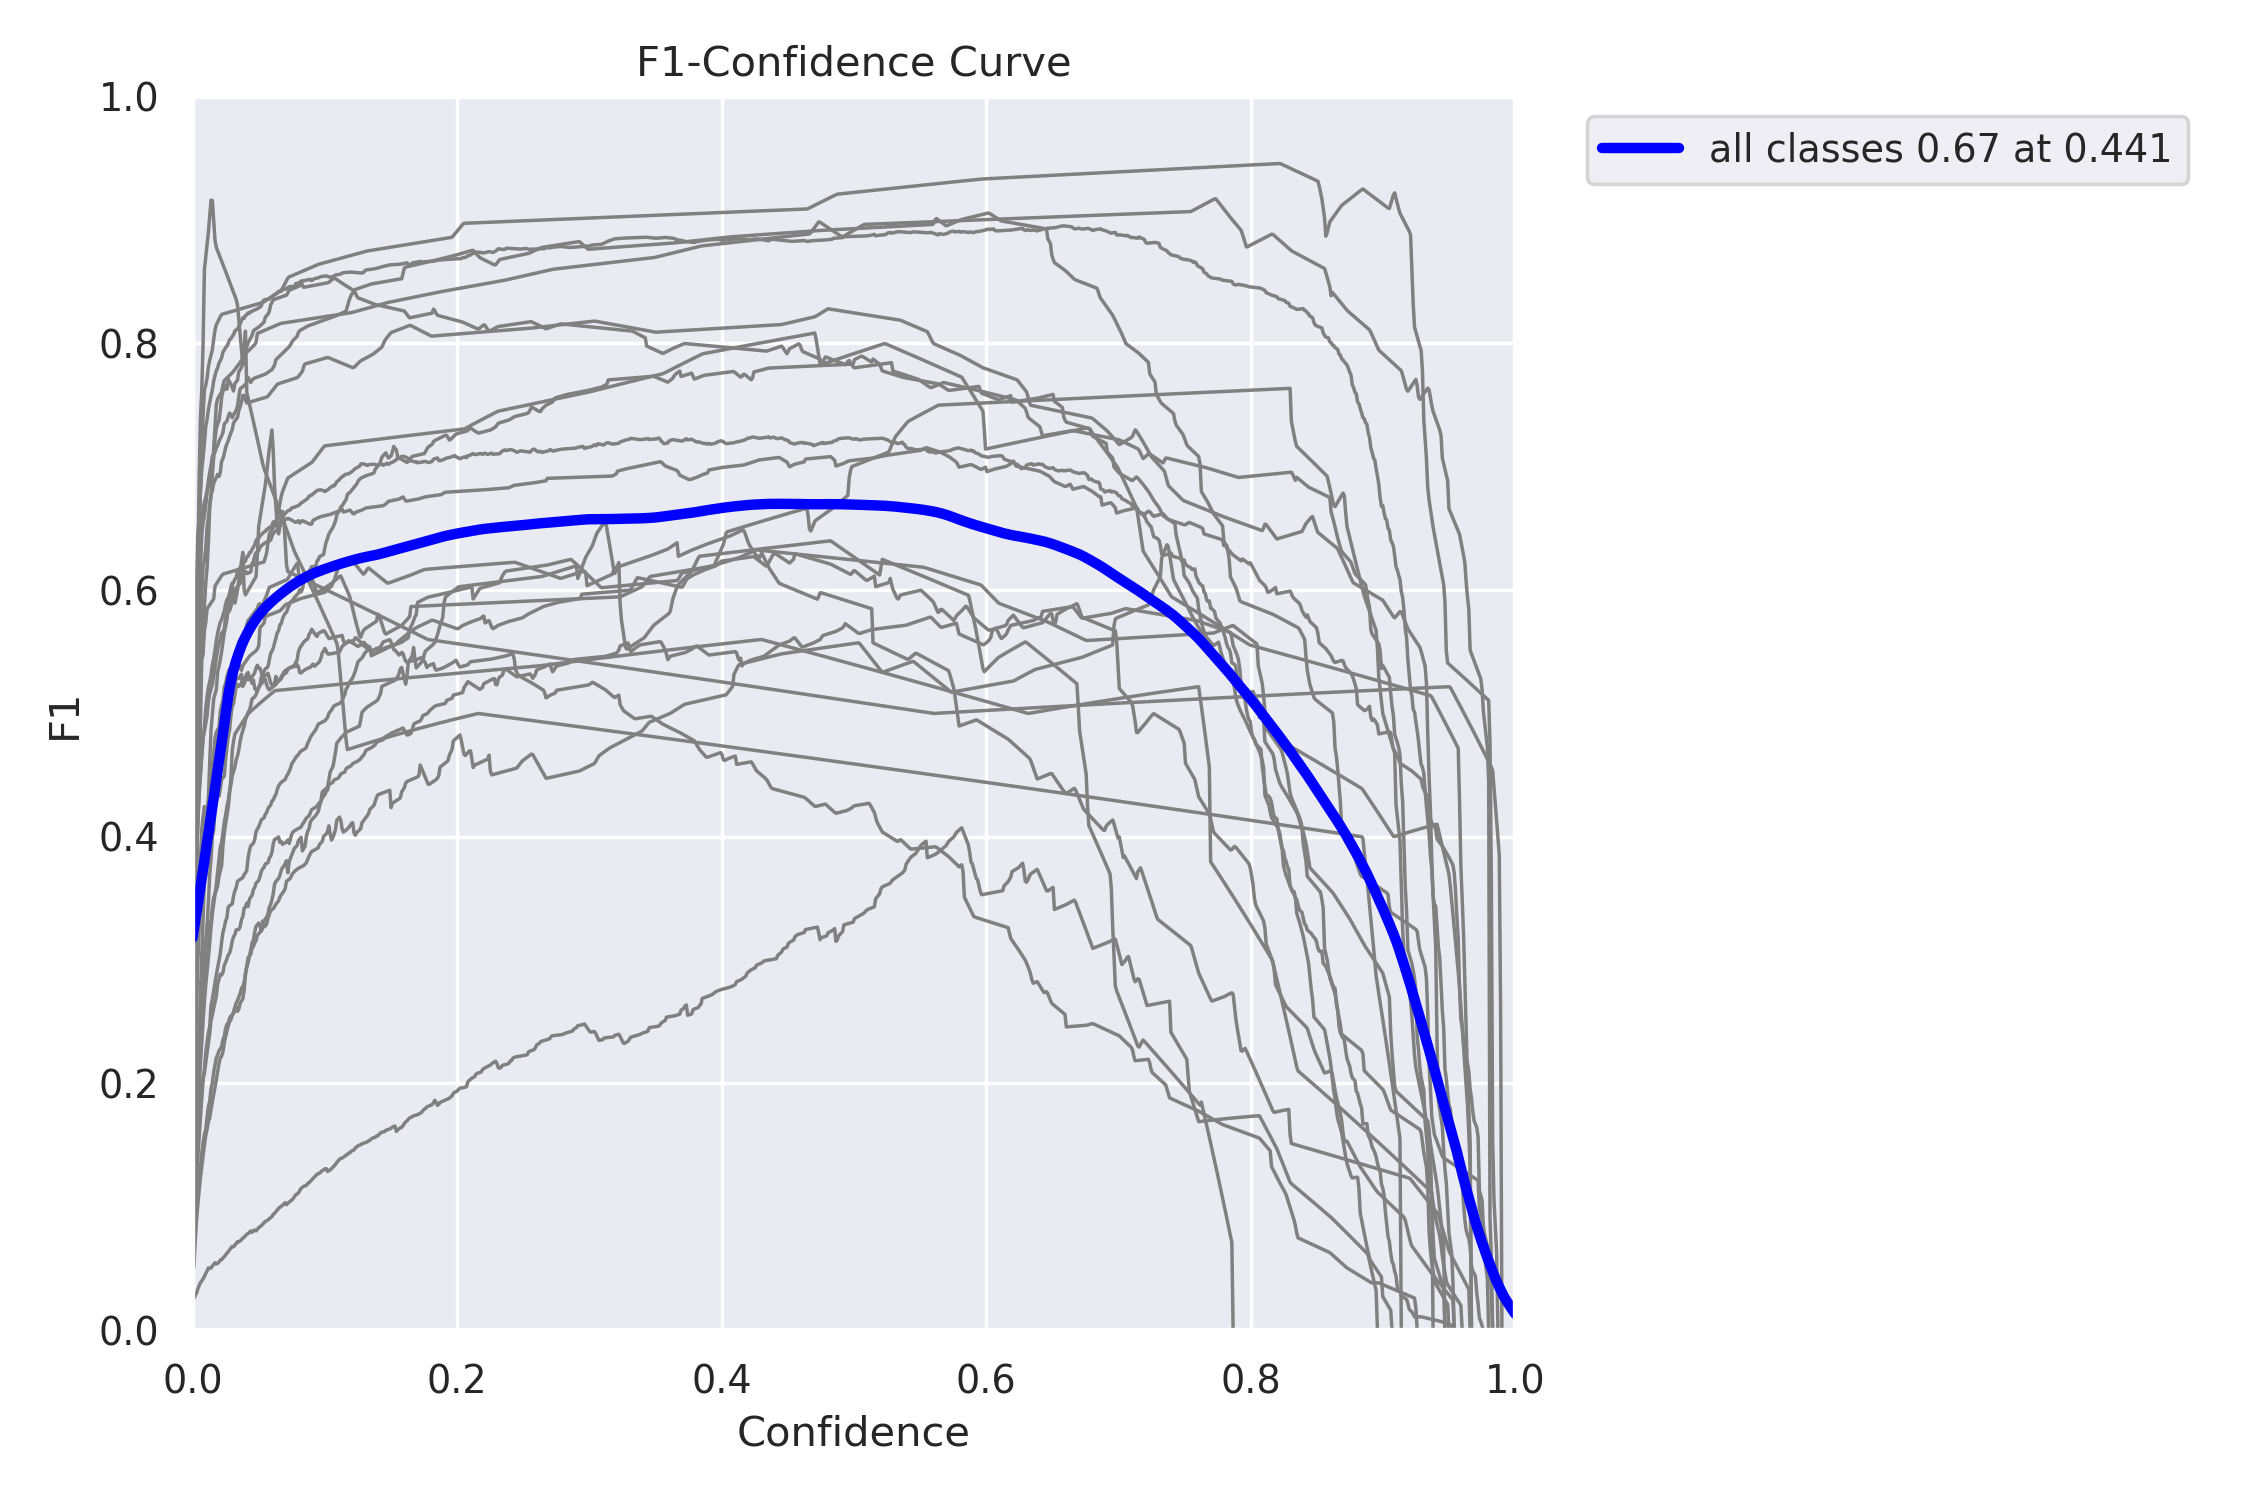

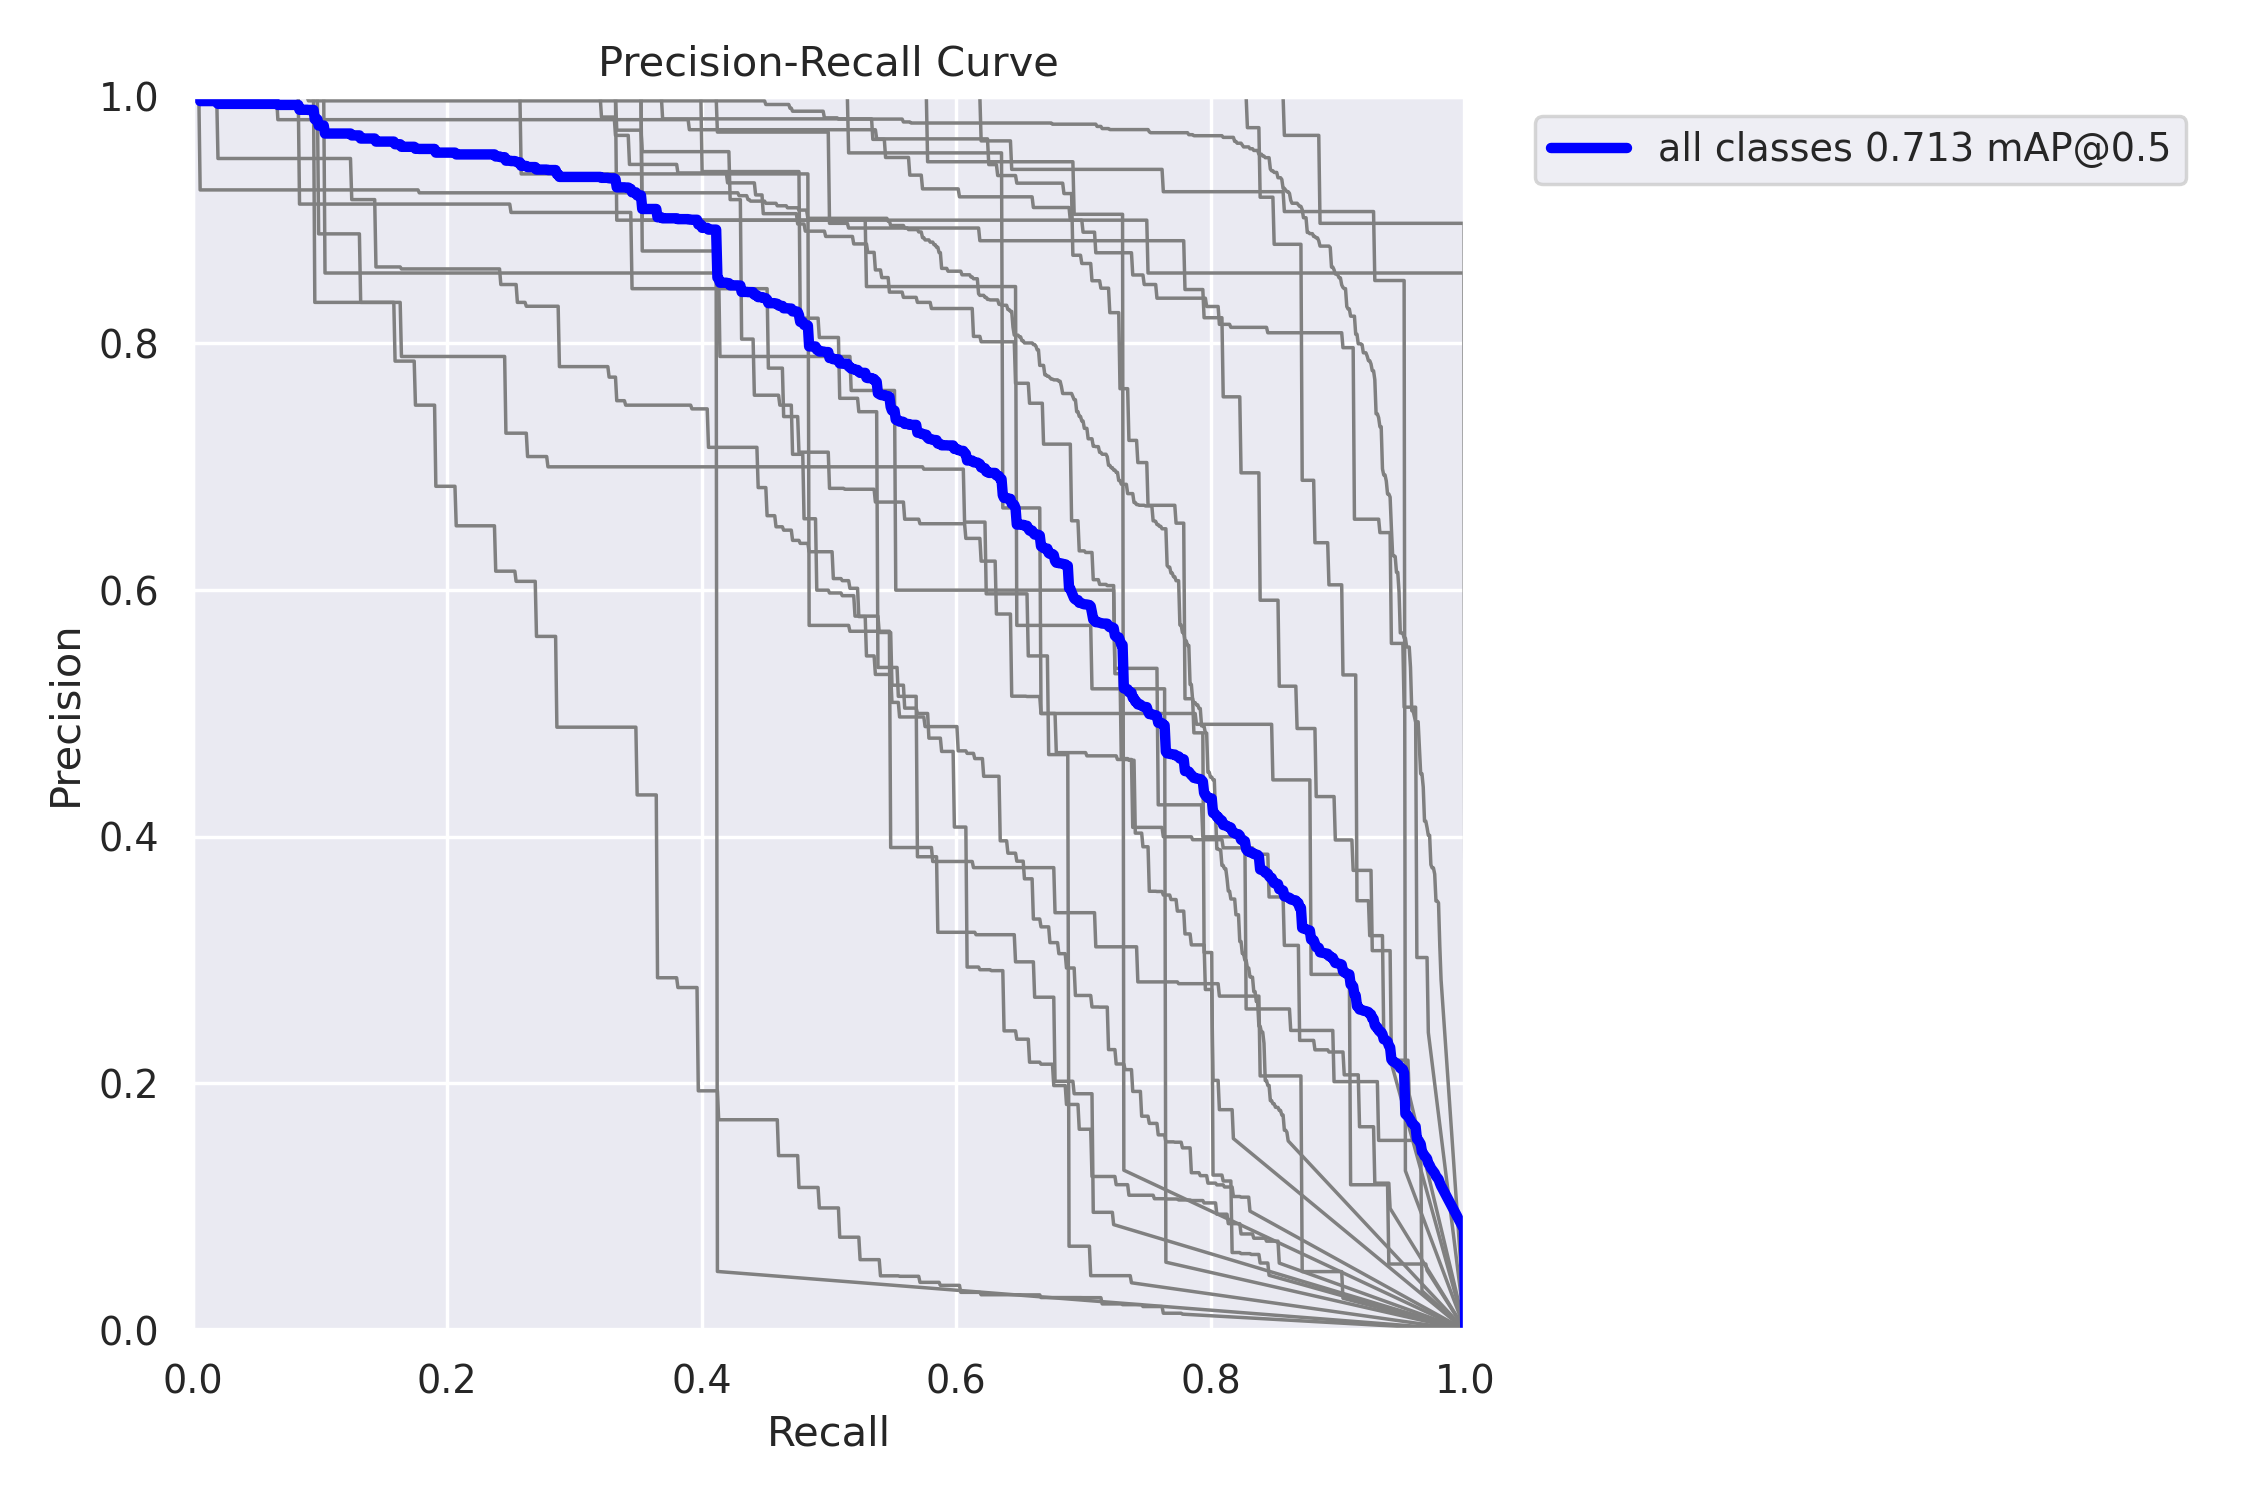

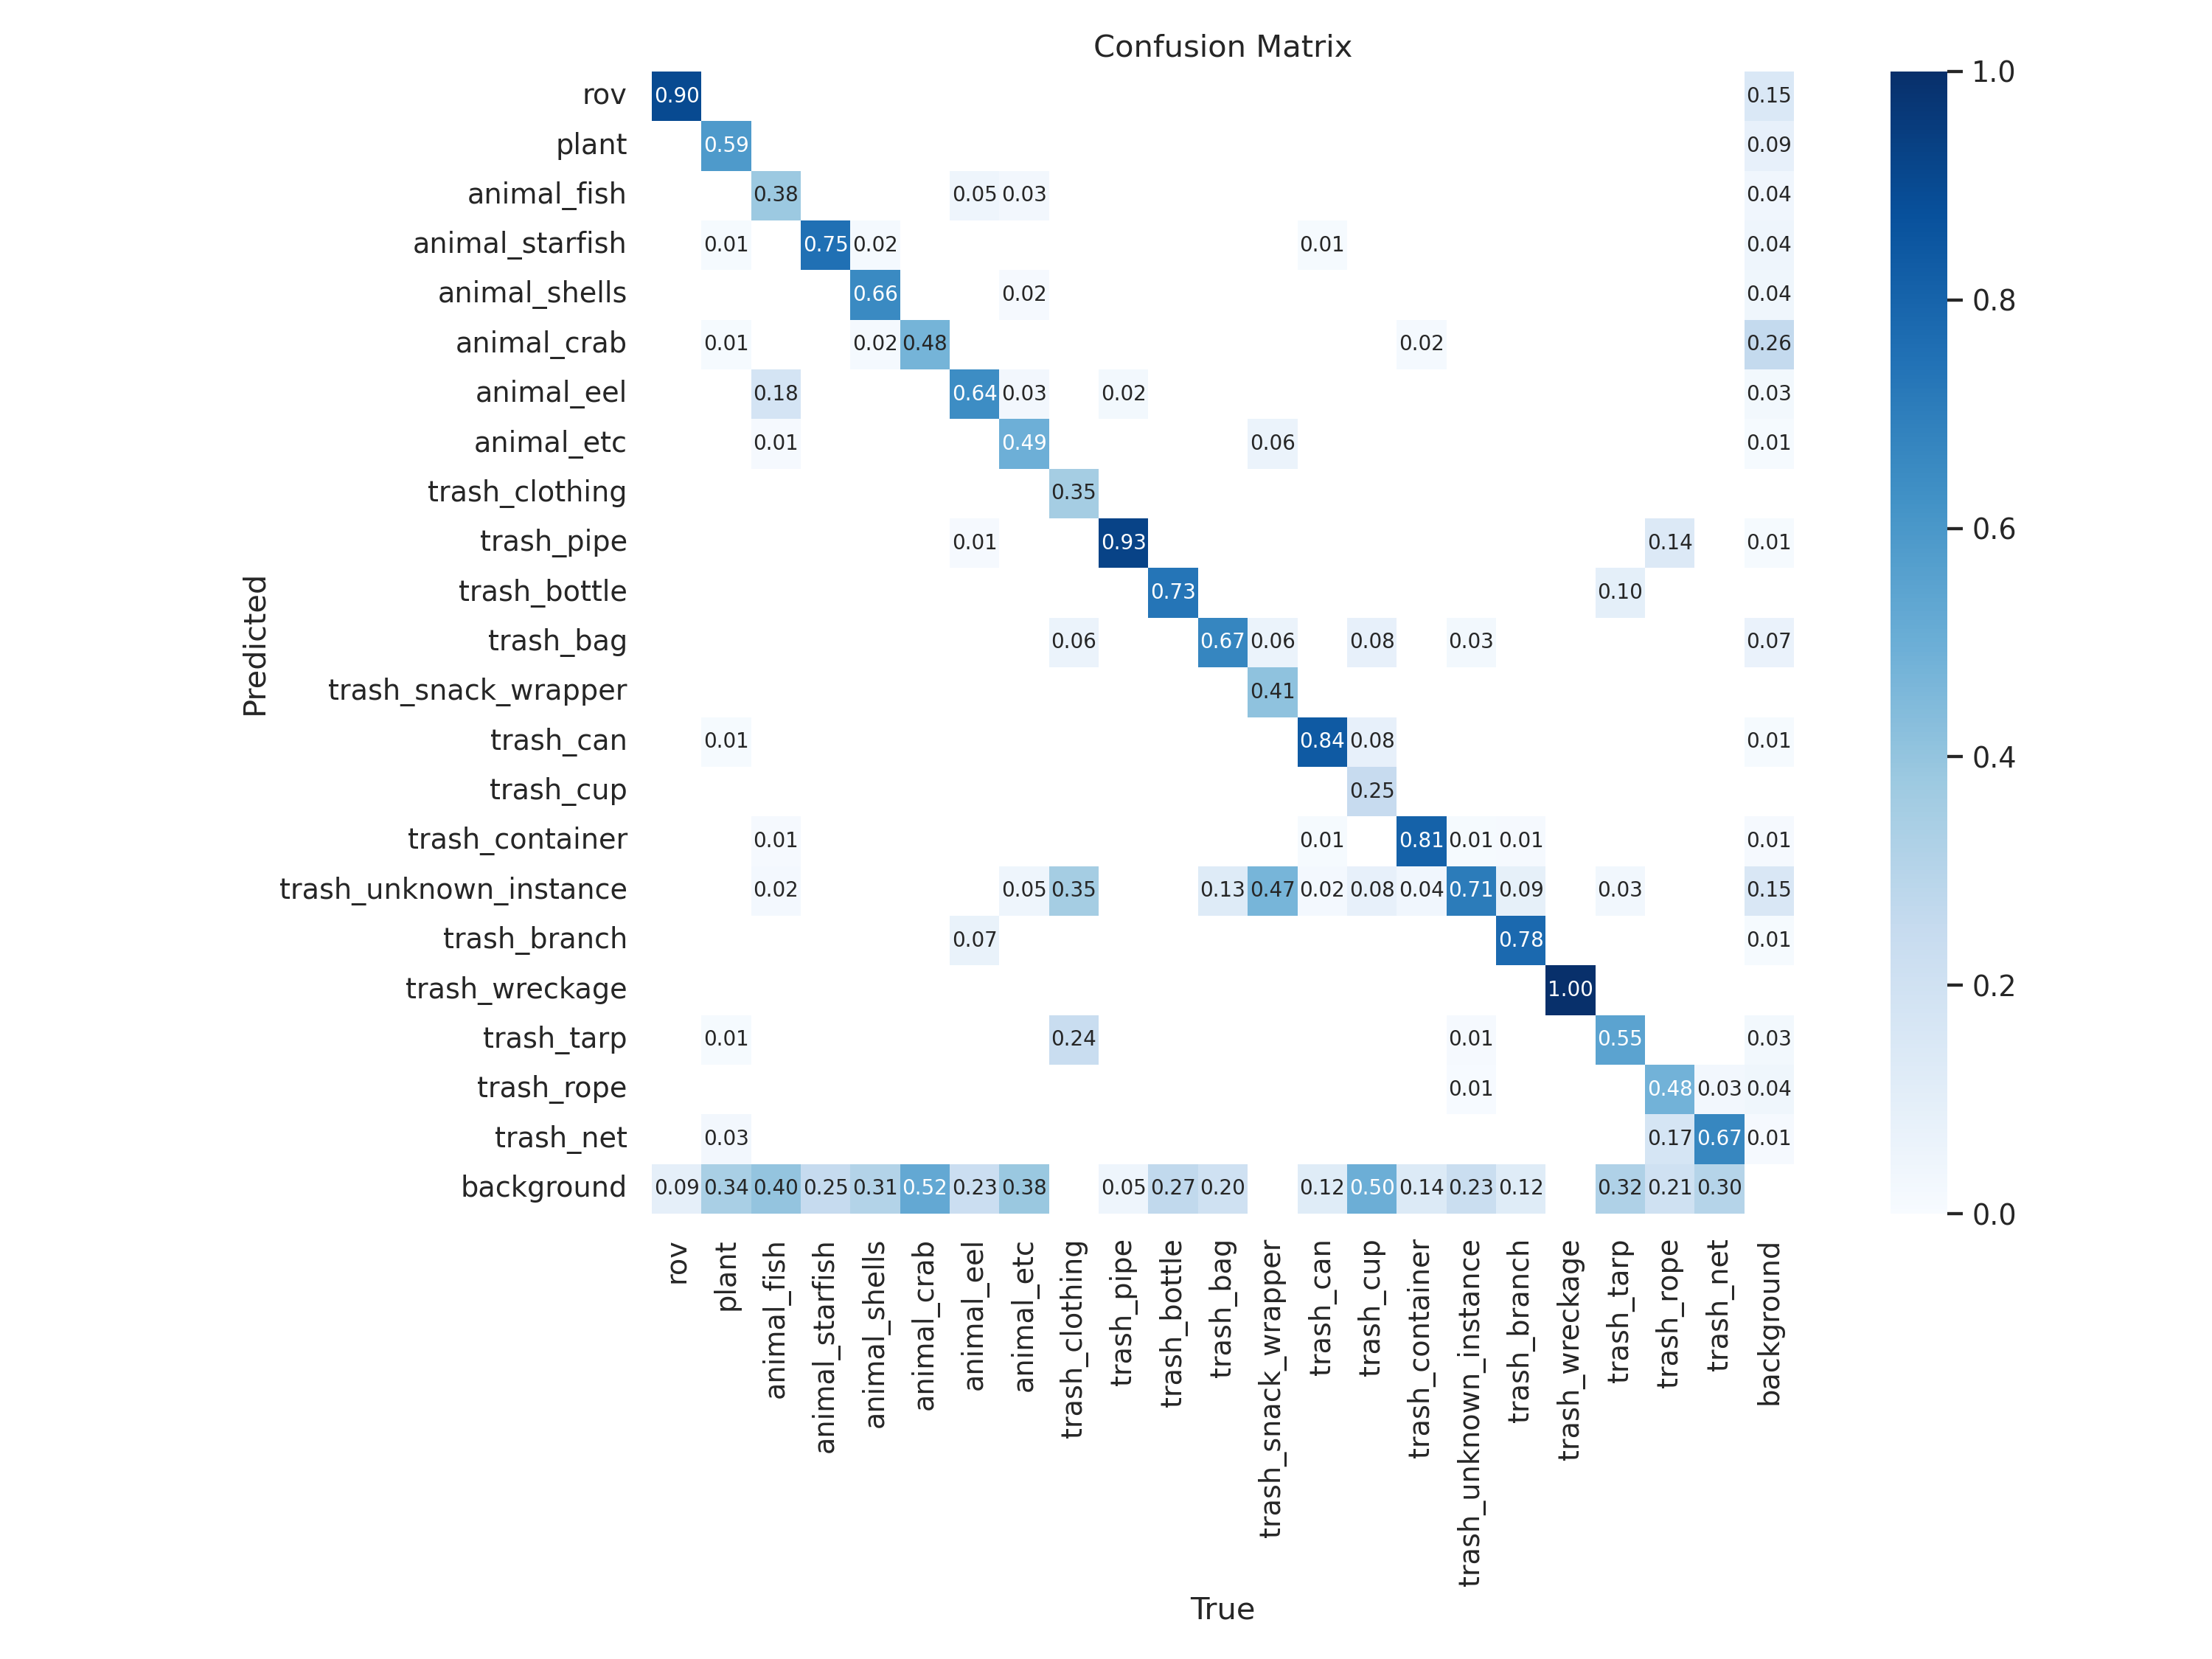

In [ ]:

from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)
     

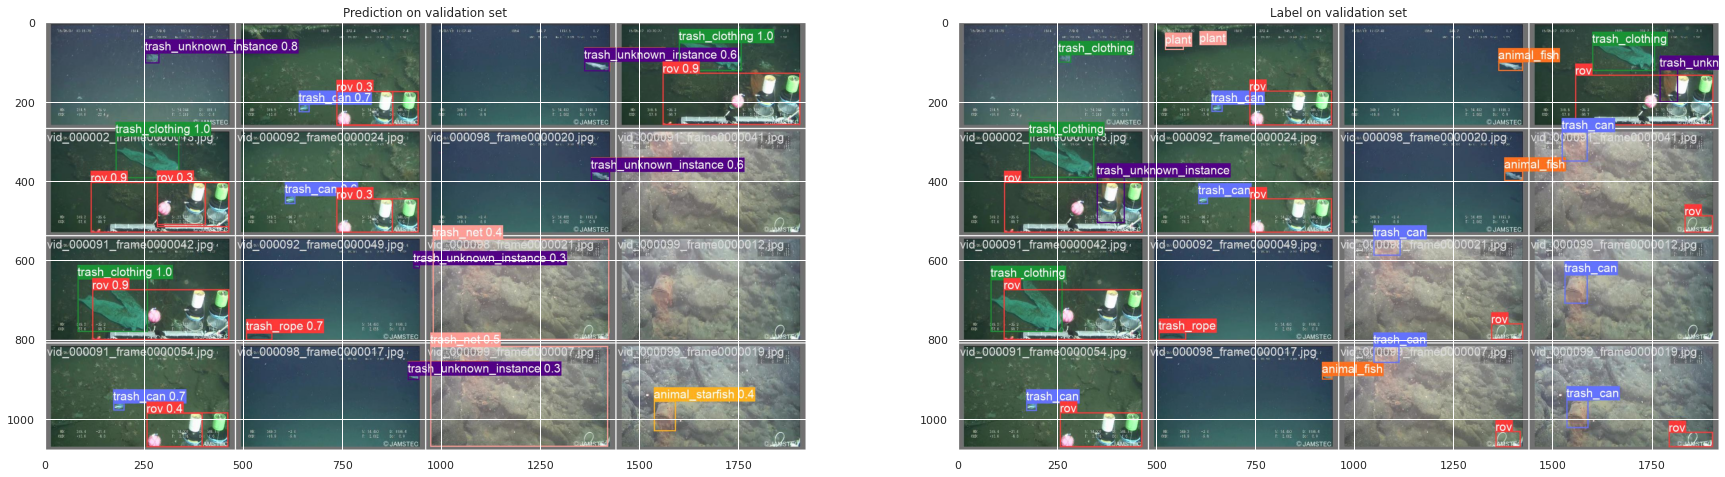

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

def load_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = np.asarray(img)
    return img

# Plot the images in a 2x1 grid
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
axs[0].imshow(load_image('runs/detect/train/val_batch0_pred.jpg'))
axs[0].set_title("Prediction on validation set")
axs[1].imshow(load_image('runs/detect/train/val_batch0_labels.jpg'))
axs[1].set_title("Label on validation set")


# Show the plot
plt.show()


## 6. Inference

In [ ]:
# checking the trained weights
!ls 'runs/detect/train/weights'

best.pt  last.pt


In [ ]:
# loading the trained model
model = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
results = model("/content/drive/MyDrive/SELab-Tutorials/Tutorial-YOLO/datasets/data/val/images/vid_000002_frame0000013.jpg") 

## 7. References

1. https://github.com/ultralytics/ultralytics
2. https://learnopencv.com/mean-average-precision-map-object-detection-model-evaluation-metric/
3. https://github.com/Balakishan77/Yolov8-Custom-Object-Detetction/blob/main/YoloV8_custom_object_detection.ipynb